Prepare the environment
-----------------------

First we'll import various functions that we'll need for generating the report.

In [1]:
%matplotlib inline

from os import environ
from os.path import join, exists, expandvars
import pandas as pd
from skbio.draw import boxplots

from taxcompare.eval_framework import (get_expected_tables_lookup, 
                                       find_and_process_result_tables,
                                       compute_mock_results,
                                       compute_mantel,
                                       generate_pr_scatter_plots,
                                       boxplot_from_data_frame,
                                       heatmap_from_data_frame,
                                       method_by_dataset_a1,
                                       method_by_dataset_a2,
                                       performance_rank_comparisons,
                                       parameter_comparisons,
                                       method_by_dataset_iterations)

Configure local environment-specific values
-------------------------------------------

**This is the only cell that you will need to edit to generate reports locally.** After editing this cell, you can run all cells in this notebook to generate your analysis report. Some of the analyses make take a few minutes to run, and analyses at more specific taxonomic levels (e.g., genus or species) will be slower than analyses at more general taxonomic levels (e.g., phylum, class). 

**This cell will not run until you fill in a taxonomic level (``2`` through ``7``).**

In [2]:
## INDICATE THE PARAMETER IDS FOR YOUR METHOD AS A COMMA-SEPARATED LIST

new_param_ids = {'mothur':['confidence']}

In [3]:
## project_dir should be the directory where you've downloaded (or cloned) the 
## short-read-tax-assignment repository. 
project_dir = expandvars("$HOME/data/short-read-tax-assignment")

precomputed_results_dir = expandvars("$HOME/data/short-read-tax-assignment/data/precomputed-results/")
expected_results_dir = join(precomputed_results_dir, "simulated-community")

## results_dirs should contain the directory or directories where
## results can be found. By default, this is just the precomputed 
## results included with the project. If other results should be included, 
## absolute paths to those directories should be added to this list.
results_dirs = \
 [precomputed_results_dir,
  ]

## Taxonomic level at which analyses should be performed. Edit this to
## the desired taxonomic level. 
# 2: phylum, 3: class, 4: order, 5: family, 6: genus, 7: species
taxonomic_level = int(environ['taxonomic_level'])

## Reference choice (must be partial-ref or full-ref)
reference_choice = environ['reference_choice']

## Minimum number of times an OTU must be observed for it to be included in analyses. Edit this
## to analyze the effect of the minimum count on taxonomic results.
min_count = 1

# set to true if select tables should be written as Excel files (useful for publication)
write_xls_files = False

In [4]:
# Define the subdirectories where the data should be, and confirm that they exist.
simulated_results_dirs = [join(results_dir,"simulated-community") for results_dir in results_dirs]

for simulated_results_dir in simulated_results_dirs:
    assert exists(simulated_results_dir), "Simulated community result directory doesn't exist: %s" % simulated_results_dir

Find pre-computed tables, expected tables, and "query" tables
-------------------------------------------------------------

Next we'll use the paths defined above to find all of the tables that will be compared. These include the *pre-computed result* tables (i.e., the ones that the new methods will be compared to), the *expected result* tables (i.e., the tables containing the known composition of the mock microbial communities), and the *query result* tables (i.e., the tables generated with the new method(s) that we want to compare to the *pre-computed result* tables).

In [5]:
results = []
for simulated_results_dir in simulated_results_dirs:
    results += find_and_process_result_tables(simulated_results_dir)

In [6]:
# Uncomment for test runs (looks at a small subset of the data)

# from random import shuffle
# shuffle(results)
# results = results[:10]

In [7]:
## SPECIFY A NEW NAME FOR YOUR SUMMARY FILE

result_fp = join(precomputed_results_dir,'simulated-community', 'level%d-results-w-mothur.csv') % taxonomic_level

In [8]:

if exists(result_fp):
    simulated_results = pd.DataFrame.from_csv(result_fp)
else:
    expected_tables = get_expected_tables_lookup(expected_results_dir, level=taxonomic_level)
    simulated_results = compute_mock_results(results, expected_tables, taxonomy_level=taxonomic_level, min_count=min_count)
    simulated_results.to_csv()

In [9]:
refernece_choice_v = [e.endswith(reference_choice) for e in simulated_results['Parameters']]
simulated_results = simulated_results[refernece_choice_v]

Evalution 1: Compute and summarize precision, recall, and F-measure
-------------------------------------------------------------------

In this evaluation, we compute and summarize precision, recall, and F-measure of each result (pre-computed and query) based on the known composition of the simulated communities. We then summarize the results in two ways: first with boxplots, and second with a table of the top methods based on their F-measures.

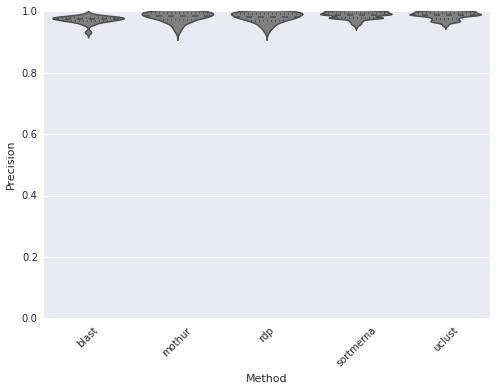

In [10]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="Precision")

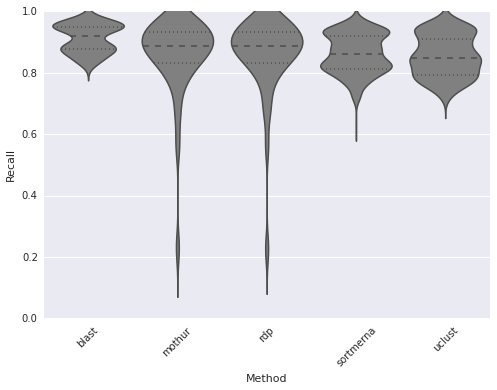

In [11]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="Recall")

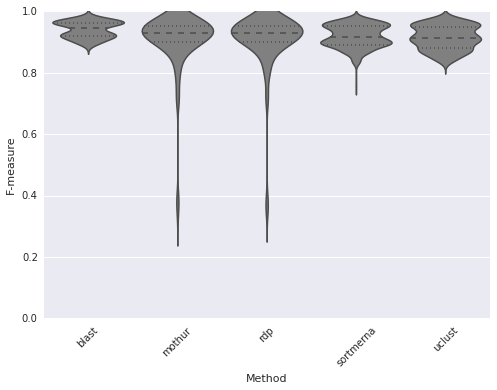

In [12]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="F-measure")

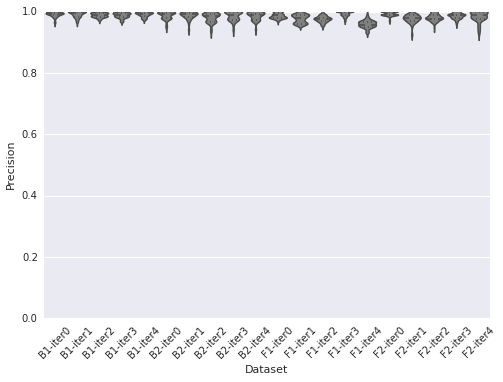

In [13]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="Precision")

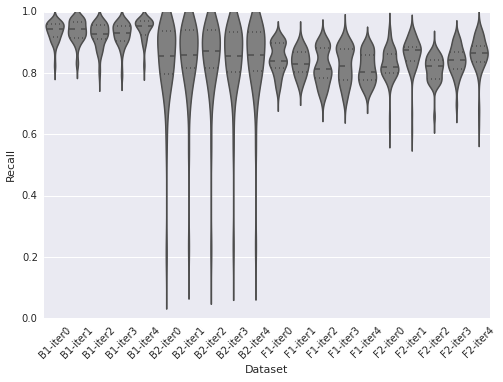

In [14]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="Recall")

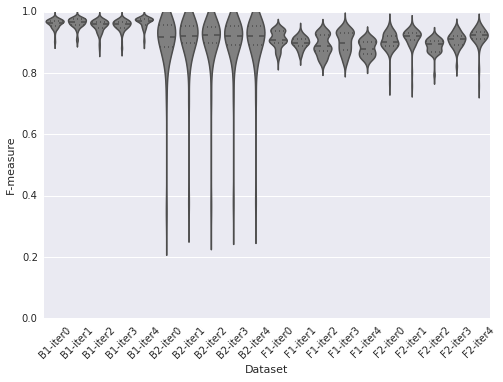

In [15]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="F-measure")

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


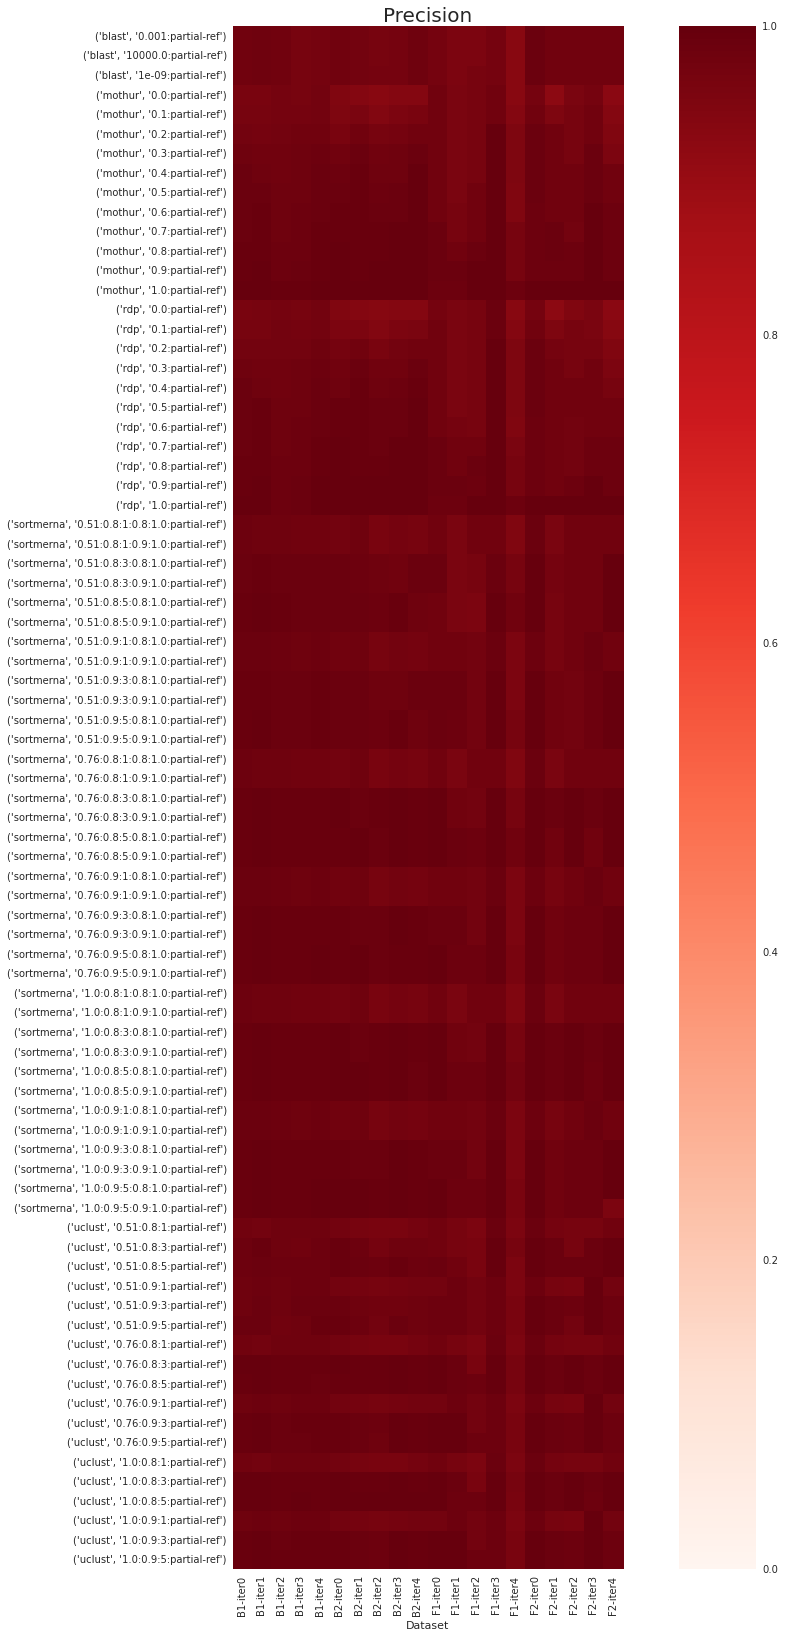

In [16]:
heatmap_from_data_frame(simulated_results, "Precision")

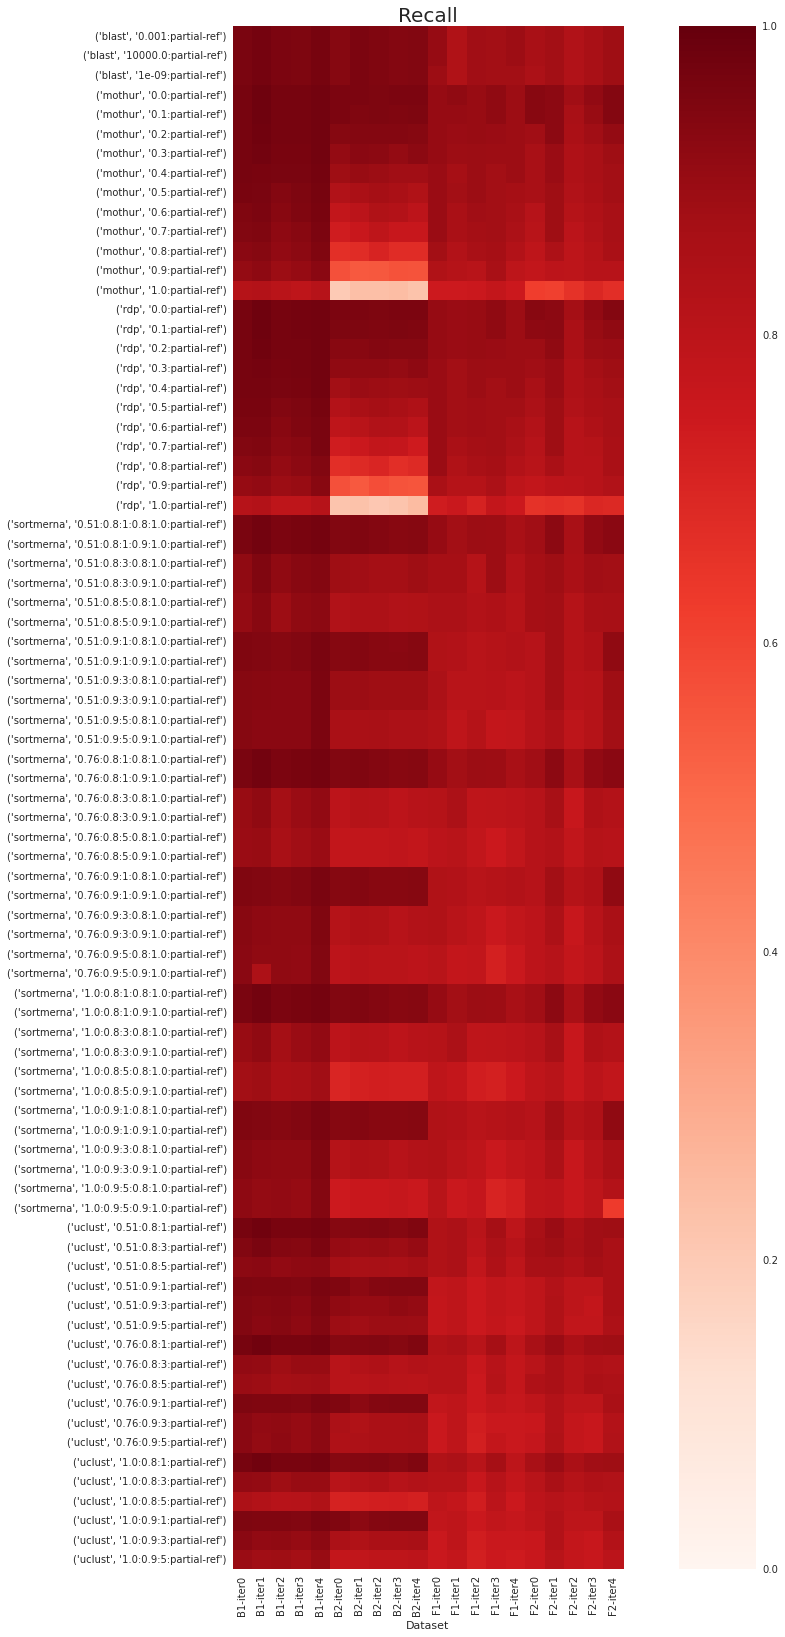

In [17]:
heatmap_from_data_frame(simulated_results, "Recall")

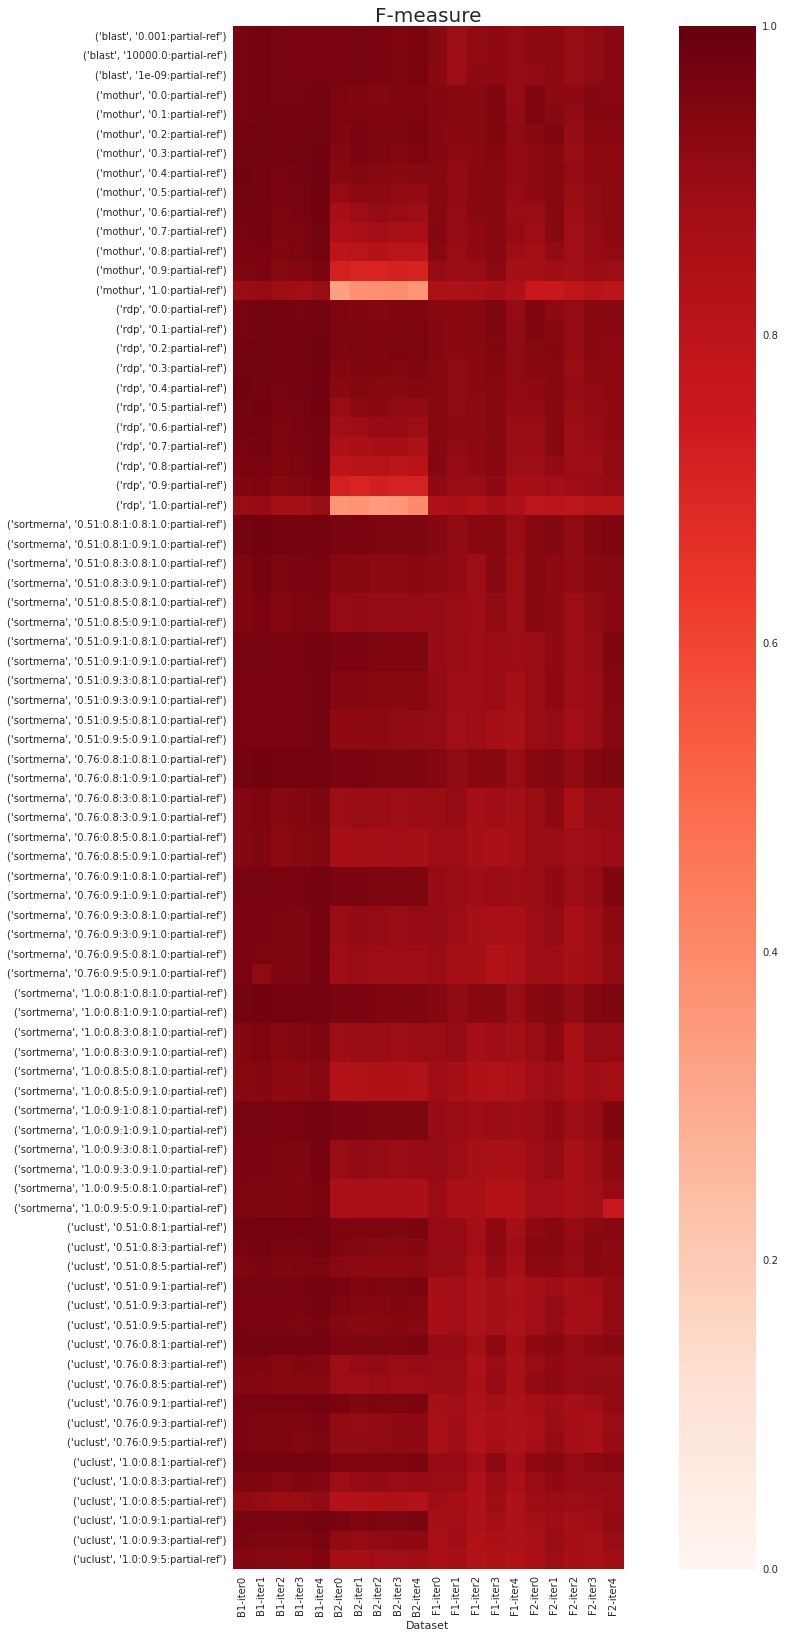

In [18]:
heatmap_from_data_frame(simulated_results, "F-measure")

In [19]:
method_by_dataset_a1(simulated_results, 'B1-iter0')

Method  Precision    Recall  F-measure
215         rdp   0.990000  0.964912   0.977295
2743     mothur   0.990000  0.964912   0.977295
247      uclust   0.980237  0.966862   0.973503
192   sortmerna   0.987952  0.959064   0.973294
208       blast   0.980040  0.957115   0.968442

In [20]:
method_by_dataset_a1(simulated_results, 'B2-iter0')

Method  Precision    Recall  F-measure
2154     uclust   0.976517  0.946869   0.961464
2048  sortmerna   0.976471  0.944972   0.960463
2117      blast   0.978218  0.937381   0.957364
3070     mothur   0.952652  0.954459   0.953555
2138        rdp   0.954373  0.952562   0.953466

In [21]:
method_by_dataset_a1(simulated_results, 'F1-iter0')

Method  Precision    Recall  F-measure
1904  sortmerna   0.979592  0.905660   0.941176
3047     mothur   0.979592  0.905660   0.941176
1986        rdp   0.979592  0.905660   0.941176
1981      blast   0.969697  0.905660   0.936585
2031     uclust   0.988889  0.839623   0.908163

In [22]:
method_by_dataset_a1(simulated_results, 'F2-iter0')

Method  Precision  Recall  F-measure
2916     mothur   0.978947    0.93   0.953846
1166        rdp   0.968750    0.93   0.948980
1134  sortmerna   0.988764    0.88   0.931217
1193     uclust   1.000000    0.87   0.930481
1165      blast   0.988506    0.86   0.919786

## Evaluation 2: Rank-based statistics comparing the performance of the optimal parameter setting run for each method on each data set.

*Count best* column indicates how many samples a given method achieved within one mean absolute deviation of the best result (which is why they sum to more than the total number of samples).

### Within-method comparisons of parameter performance

In [23]:
metrics = ['Precision', 'Recall', 'F-measure']

In [24]:
rdp_top_params = parameter_comparisons(simulated_results, "rdp", metrics=metrics)
rdp_top_params[:15]

F-measure  Precision  Recall
0.0:partial-ref         20          0      20
0.1:partial-ref         20          0      20
0.2:partial-ref         20          1      19
0.3:partial-ref         20          3      18
0.4:partial-ref         19          5      16
0.5:partial-ref         17          8      15
0.6:partial-ref         15          9      14
0.7:partial-ref         14         14       5
0.8:partial-ref          4         13       1
0.9:partial-ref          0         15       0
1.0:partial-ref          0         20       0

In [25]:
uclust_top_params = parameter_comparisons(simulated_results, "uclust", metrics=metrics)
uclust_top_params[:15]

F-measure  Precision  Recall
0.51:0.8:1:partial-ref         19          0      19
0.76:0.8:1:partial-ref         19          0      19
1.0:0.8:1:partial-ref          19          0      19
0.51:0.8:3:partial-ref         19          7      19
1.0:0.9:1:partial-ref          10          1      10
0.76:0.9:1:partial-ref         10          1      10
0.51:0.9:1:partial-ref         10          1      10
0.51:0.9:3:partial-ref          8          6       8
0.51:0.8:5:partial-ref          8          8       6
0.51:0.9:5:partial-ref          7          8       4
0.76:0.8:5:partial-ref          4         17       3
0.76:0.8:3:partial-ref          2         17       2
1.0:0.8:3:partial-ref           2         17       2
0.76:0.9:3:partial-ref          0         16       0
0.76:0.9:5:partial-ref          0         16       0

In [26]:
sortmerna_top_params = parameter_comparisons(simulated_results, "sortmerna", metrics=metrics)
sortmerna_top_params[:15]

F-measure  Precision  Recall
0.51:0.8:1:0.8:1.0:partial-ref         20          0      20
0.76:0.8:1:0.8:1.0:partial-ref         20          0      20
1.0:0.8:1:0.9:1.0:partial-ref          20          0      20
1.0:0.8:1:0.8:1.0:partial-ref          20          0      20
0.51:0.8:1:0.9:1.0:partial-ref         20          0      20
0.76:0.8:1:0.9:1.0:partial-ref         20          0      20
1.0:0.9:1:0.9:1.0:partial-ref          11          1      11
1.0:0.9:1:0.8:1.0:partial-ref          11          1      11
0.76:0.9:1:0.9:1.0:partial-ref         11          1      11
0.76:0.9:1:0.8:1.0:partial-ref         11          1      11
0.51:0.8:3:0.8:1.0:partial-ref         11          4       8
0.51:0.9:1:0.9:1.0:partial-ref         11          1      11
0.51:0.9:1:0.8:1.0:partial-ref         11          1      11
0.51:0.8:3:0.9:1.0:partial-ref         11          4       8
0.51:0.9:3:0.9:1.0:partial-ref          9         10       7

In [27]:
blast_top_params = parameter_comparisons(simulated_results, "blast", metrics=metrics)
blast_top_params[:15]

F-measure  Precision  Recall
0.001:partial-ref           17         17      20
10000.0:partial-ref         17         17      20
1e-09:partial-ref           17         17      16

In [28]:
## OUTPUT RESULTS FOR YOUR NEW METHOD

mothur_top_params = parameter_comparisons(simulated_results, "mothur", metrics=['F-measure'])
mothur_top_params[:15]

F-measure
0.1:partial-ref         20
0.2:partial-ref         20
0.0:partial-ref         19
0.3:partial-ref         19
0.4:partial-ref         19
0.5:partial-ref         18
0.6:partial-ref         15
0.7:partial-ref         14
0.8:partial-ref          5

### Between-method performance comparisons based on best parameter set determined above

In [29]:
sort_field = 'F-measure'
display_fields = ['Method', 'Precision', 'Recall', 'F-measure']
mp_combs = {}
## ADD YOUR METHOD TO THE LIST OF METHODS TO BE COMPARED
for e in ['rdp', 'blast', 'sortmerna', 'uclust', 'mothur']:
    mp_combs[e] = parameter_comparisons(simulated_results, e, metrics=[sort_field]).index[0]


In [30]:
method_by_dataset_iterations(simulated_results, 'B1', mp_combs.items(), sort_field, display_fields)

Precision    Recall  F-measure
Method                                   
uclust      0.980474  0.967256   0.973802
sortmerna   0.981605  0.964170   0.972789
rdp         0.969222  0.971678   0.970438
mothur      0.968471  0.971289   0.969865
blast       0.975724  0.959520   0.967544

In [31]:
method_by_dataset_iterations(simulated_results, 'B2', mp_combs.items(), sort_field, display_fields)

Precision    Recall  F-measure
Method                                   
blast       0.974487  0.945106   0.959549
sortmerna   0.971961  0.940011   0.955711
uclust      0.968141  0.940851   0.954292
mothur      0.946988  0.952013   0.949458
rdp         0.946760  0.951818   0.949257

In [32]:
method_by_dataset_iterations(simulated_results, 'F1', mp_combs.items(), sort_field, display_fields)

Precision    Recall  F-measure
Method                                   
mothur      0.964772  0.904153   0.933453
rdp         0.965642  0.901323   0.932355
sortmerna   0.968890  0.884354   0.924682
blast       0.956824  0.878565   0.915849
uclust      0.968734  0.832822   0.895560

In [33]:
method_by_dataset_iterations(simulated_results, 'F2', mp_combs.items(), sort_field, display_fields)

Precision    Recall  F-measure
Method                                   
sortmerna   0.976829  0.901231   0.937235
mothur      0.956116  0.914273   0.934376
rdp         0.951825  0.909250   0.929724
uclust      0.973852  0.875426   0.921907
blast       0.979858  0.863773   0.918055